In [1]:
## Import Libraries
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
##Read CSV File
Telecom_churn = pd.read_csv(r"C:\Users\andre\OneDrive\Desktop\New folder\telecom_churn.csv")

In [3]:
print(Telecom_churn)

      GENDER_CD  EDUCATION_CD  OCCUPATION_CAT_CD  SUBS_TENURE  \
0             M           2.0                NaN          198   
1             M           1.0                NaN          114   
2             M           2.0               24.0          114   
3             M           1.0               87.0          228   
4             F           4.0               22.0          168   
5             M           2.0                NaN          132   
6             M           3.0                NaN          120   
7             M           2.0                NaN          138   
8             M           NaN                NaN          126   
9             M           2.0                NaN          144   
10            M           2.0                NaN          108   
11            M           1.0                NaN          126   
12            M           1.0                NaN          138   
13            M           NaN                NaN          120   
14            M          

In [4]:
Telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Columns: 108 entries, GENDER_CD to CHURN_FLG
dtypes: float64(46), int64(60), object(2)
memory usage: 10.9+ MB


In [5]:
Telecom_churn.columns

Index(['GENDER_CD', 'EDUCATION_CD', 'OCCUPATION_CAT_CD', 'SUBS_TENURE',
       'OB_CALL_INTL_DUR_BASE_1', 'OB_CALL_INTL_DUR_BASE_2',
       'OB_CALL_INTL_DUR_BASE_3', 'OB_CALL_INTL_DUR_BASE_4',
       'OB_CALL_INTL_DUR_BASE_5', 'OB_CALL_INTL_DUR_BASE_6',
       ...
       'PROPN_IB_LOW_DUR', 'RATIO_SPEC_SMS_SMS_REV_AMT',
       'PCT_CHNG_SUSPENDED_CNT', 'PCT_CHNG_BILL_AMT', 'CUST_SUBS_ID',
       'TOT_REV_AMT', 'TOT_PROF_AMT', 'CUST_ID', 'name', 'CHURN_FLG'],
      dtype='object', length=108)

In [6]:
## Find if there are any null values in the data and how many
Telecom_churn.isnull().any()
Telecom_churn.isnull().sum()

GENDER_CD                        96
EDUCATION_CD                   2901
OCCUPATION_CAT_CD              6683
SUBS_TENURE                       0
OB_CALL_INTL_DUR_BASE_1           0
OB_CALL_INTL_DUR_BASE_2           0
OB_CALL_INTL_DUR_BASE_3           0
OB_CALL_INTL_DUR_BASE_4           0
OB_CALL_INTL_DUR_BASE_5           0
OB_CALL_INTL_DUR_BASE_6           0
OB_CALL_NAT_ROAM_CNT_BASE_1       0
OB_CALL_NAT_ROAM_CNT_BASE_2       0
OB_CALL_NAT_ROAM_CNT_BASE_3       0
OB_CALL_NAT_ROAM_CNT_BASE_4       0
OB_CALL_NAT_ROAM_CNT_BASE_5       0
OB_CALL_NAT_ROAM_CNT_BASE_6       0
OB_CALL_LOC_DUR_BASE_1            0
OB_CALL_LOC_DUR_BASE_2            0
OB_CALL_LOC_DUR_BASE_3            0
OB_CALL_LOC_DUR_BASE_4            0
OB_CALL_LOC_DUR_BASE_5            0
OB_CALL_LOC_DUR_BASE_6            0
OB_CALL_NAT_DUR_BASE_1            0
OB_CALL_NAT_DUR_BASE_2            0
OB_CALL_NAT_DUR_BASE_3            0
OB_CALL_NAT_DUR_BASE_4            0
OB_CALL_NAT_DUR_BASE_5            0
OB_CALL_NAT_DUR_BASE_6      

In [7]:
## Make array with just the missing values columns
missing_val = Telecom_churn[["GENDER_CD","EDUCATION_CD","OCCUPATION_CAT_CD","TOT_REV_AMT","TOT_PROF_AMT"]]

In [8]:
missing_mean = missing_val.mean()
missing_mean

EDUCATION_CD          1.638757
OCCUPATION_CAT_CD    34.995394
TOT_REV_AMT          22.214628
TOT_PROF_AMT         22.214628
dtype: float64

In [9]:
missing_mean = round(missing_val.mean())
missing_mean
## Gender is missing cause those are strings

EDUCATION_CD          2.0
OCCUPATION_CAT_CD    35.0
TOT_REV_AMT          22.0
TOT_PROF_AMT         22.0
dtype: float64

In [10]:
Telecom_impute = missing_val.fillna(missing_mean)
Telecom_impute
## filled in the data with the missing mean so the statistical calculations wont be affected

,GENDER_CD,EDUCATION_CD,OCCUPATION_CAT_CD,TOT_REV_AMT,TOT_PROF_AMT
0,M,2.0,35.0,22.0,22.0
1,M,1.0,35.0,99.0,99.0
2,M,2.0,24.0,47.0,47.0
3,M,1.0,87.0,22.0,22.0
4,F,4.0,22.0,97.0,97.0
5,M,2.0,35.0,22.0,22.0
6,M,3.0,35.0,22.0,22.0
7,M,2.0,35.0,22.0,22.0
8,M,2.0,35.0,10.0,10.0
9,M,2.0,35.0,3.0,3.0


In [11]:
Telecom_impute.isnull().any()

GENDER_CD             True
EDUCATION_CD         False
OCCUPATION_CAT_CD    False
TOT_REV_AMT          False
TOT_PROF_AMT         False
dtype: bool

In [12]:
Telecom_churn[["GENDER_CD","EDUCATION_CD","OCCUPATION_CAT_CD","TOT_REV_AMT","TOT_PROF_AMT"]] = Telecom_impute
Telecom_churn

,GENDER_CD,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,...,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,name,CHURN_FLG
0,M,2.0,35.0,198,16.8,16.3,15.2,18.0,15.4,13.9,...,0.739130,0.000000e+00,0.0,0.955526,1,22.0,22.0,5198,Amy H Thomas,0
1,M,1.0,35.0,114,2.9,4.6,19.0,16.1,11.6,13.6,...,1.576923,1.563786e+00,0.0,0.938199,2,99.0,99.0,752,Ignatius T Lyod,1
2,M,2.0,24.0,114,2.5,4.7,18.5,18.8,19.4,16.8,...,1.538462,4.108014e+00,5000.0,0.720440,3,47.0,47.0,3501,Leo C Wood,1
3,M,1.0,87.0,228,16.0,15.8,15.5,17.4,11.7,11.0,...,1.655172,0.000000e+00,0.0,0.880032,4,22.0,22.0,5406,Augustine X Turner,0
4,F,4.0,22.0,168,14.6,14.1,16.3,13.5,13.4,14.6,...,1.733333,0.000000e+00,0.0,1.282770,5,97.0,97.0,6115,Demie A Shaw,1
5,M,2.0,35.0,132,15.8,13.4,13.9,13.1,19.1,19.3,...,0.933333,0.000000e+00,0.0,0.917737,6,22.0,22.0,5478,Desmond N Moss,0
6,M,3.0,35.0,120,11.0,17.1,14.4,18.1,13.2,12.7,...,0.363636,0.000000e+00,0.0,1.031565,7,22.0,22.0,514,Alexandria F Maxwell,0
7,M,2.0,35.0,138,14.6,17.5,11.7,19.5,13.0,17.6,...,1.902439,0.000000e+00,0.0,1.778163,8,22.0,22.0,5586,Neal E Botham,0
8,M,2.0,35.0,126,13.0,16.2,12.1,14.2,15.2,14.1,...,0.857143,0.000000e+00,0.0,0.655683,9,10.0,10.0,3384,Jack Z Gray,0
9,M,2.0,35.0,144,17.8,12.0,13.7,14.2,13.0,16.8,...,1.565217,0.000000e+00,0.0,0.522311,10,3.0,3.0,1410,Chelsea D Mcintyre,0


In [13]:
Telecom_churn.isnull().any()

GENDER_CD                       True
EDUCATION_CD                   False
OCCUPATION_CAT_CD              False
SUBS_TENURE                    False
OB_CALL_INTL_DUR_BASE_1        False
OB_CALL_INTL_DUR_BASE_2        False
OB_CALL_INTL_DUR_BASE_3        False
OB_CALL_INTL_DUR_BASE_4        False
OB_CALL_INTL_DUR_BASE_5        False
OB_CALL_INTL_DUR_BASE_6        False
OB_CALL_NAT_ROAM_CNT_BASE_1    False
OB_CALL_NAT_ROAM_CNT_BASE_2    False
OB_CALL_NAT_ROAM_CNT_BASE_3    False
OB_CALL_NAT_ROAM_CNT_BASE_4    False
OB_CALL_NAT_ROAM_CNT_BASE_5    False
OB_CALL_NAT_ROAM_CNT_BASE_6    False
OB_CALL_LOC_DUR_BASE_1         False
OB_CALL_LOC_DUR_BASE_2         False
OB_CALL_LOC_DUR_BASE_3         False
OB_CALL_LOC_DUR_BASE_4         False
OB_CALL_LOC_DUR_BASE_5         False
OB_CALL_LOC_DUR_BASE_6         False
OB_CALL_NAT_DUR_BASE_1         False
OB_CALL_NAT_DUR_BASE_2         False
OB_CALL_NAT_DUR_BASE_3         False
OB_CALL_NAT_DUR_BASE_4         False
OB_CALL_NAT_DUR_BASE_5         False
O

In [14]:
missing_col = Telecom_churn[["GENDER_CD"]]

In [15]:
Telecom_mode = missing_col.mode()
Telecom_mode

,GENDER_CD
0,M


In [16]:
Telecom_impute = missing_col.fillna("M")
Telecom_impute

,GENDER_CD
0,M
1,M
2,M
3,M
4,F
5,M
6,M
7,M
8,M
9,M


In [17]:
Telecom_churn[["GENDER_CD"]] = Telecom_impute
Telecom_churn

,GENDER_CD,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,...,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,name,CHURN_FLG
0,M,2.0,35.0,198,16.8,16.3,15.2,18.0,15.4,13.9,...,0.739130,0.000000e+00,0.0,0.955526,1,22.0,22.0,5198,Amy H Thomas,0
1,M,1.0,35.0,114,2.9,4.6,19.0,16.1,11.6,13.6,...,1.576923,1.563786e+00,0.0,0.938199,2,99.0,99.0,752,Ignatius T Lyod,1
2,M,2.0,24.0,114,2.5,4.7,18.5,18.8,19.4,16.8,...,1.538462,4.108014e+00,5000.0,0.720440,3,47.0,47.0,3501,Leo C Wood,1
3,M,1.0,87.0,228,16.0,15.8,15.5,17.4,11.7,11.0,...,1.655172,0.000000e+00,0.0,0.880032,4,22.0,22.0,5406,Augustine X Turner,0
4,F,4.0,22.0,168,14.6,14.1,16.3,13.5,13.4,14.6,...,1.733333,0.000000e+00,0.0,1.282770,5,97.0,97.0,6115,Demie A Shaw,1
5,M,2.0,35.0,132,15.8,13.4,13.9,13.1,19.1,19.3,...,0.933333,0.000000e+00,0.0,0.917737,6,22.0,22.0,5478,Desmond N Moss,0
6,M,3.0,35.0,120,11.0,17.1,14.4,18.1,13.2,12.7,...,0.363636,0.000000e+00,0.0,1.031565,7,22.0,22.0,514,Alexandria F Maxwell,0
7,M,2.0,35.0,138,14.6,17.5,11.7,19.5,13.0,17.6,...,1.902439,0.000000e+00,0.0,1.778163,8,22.0,22.0,5586,Neal E Botham,0
8,M,2.0,35.0,126,13.0,16.2,12.1,14.2,15.2,14.1,...,0.857143,0.000000e+00,0.0,0.655683,9,10.0,10.0,3384,Jack Z Gray,0
9,M,2.0,35.0,144,17.8,12.0,13.7,14.2,13.0,16.8,...,1.565217,0.000000e+00,0.0,0.522311,10,3.0,3.0,1410,Chelsea D Mcintyre,0


In [18]:
Telecom_churn.isnull().any()

GENDER_CD                      False
EDUCATION_CD                   False
OCCUPATION_CAT_CD              False
SUBS_TENURE                    False
OB_CALL_INTL_DUR_BASE_1        False
OB_CALL_INTL_DUR_BASE_2        False
OB_CALL_INTL_DUR_BASE_3        False
OB_CALL_INTL_DUR_BASE_4        False
OB_CALL_INTL_DUR_BASE_5        False
OB_CALL_INTL_DUR_BASE_6        False
OB_CALL_NAT_ROAM_CNT_BASE_1    False
OB_CALL_NAT_ROAM_CNT_BASE_2    False
OB_CALL_NAT_ROAM_CNT_BASE_3    False
OB_CALL_NAT_ROAM_CNT_BASE_4    False
OB_CALL_NAT_ROAM_CNT_BASE_5    False
OB_CALL_NAT_ROAM_CNT_BASE_6    False
OB_CALL_LOC_DUR_BASE_1         False
OB_CALL_LOC_DUR_BASE_2         False
OB_CALL_LOC_DUR_BASE_3         False
OB_CALL_LOC_DUR_BASE_4         False
OB_CALL_LOC_DUR_BASE_5         False
OB_CALL_LOC_DUR_BASE_6         False
OB_CALL_NAT_DUR_BASE_1         False
OB_CALL_NAT_DUR_BASE_2         False
OB_CALL_NAT_DUR_BASE_3         False
OB_CALL_NAT_DUR_BASE_4         False
OB_CALL_NAT_DUR_BASE_5         False
O

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105]), <a list of 106 Text xticklabel objects>)

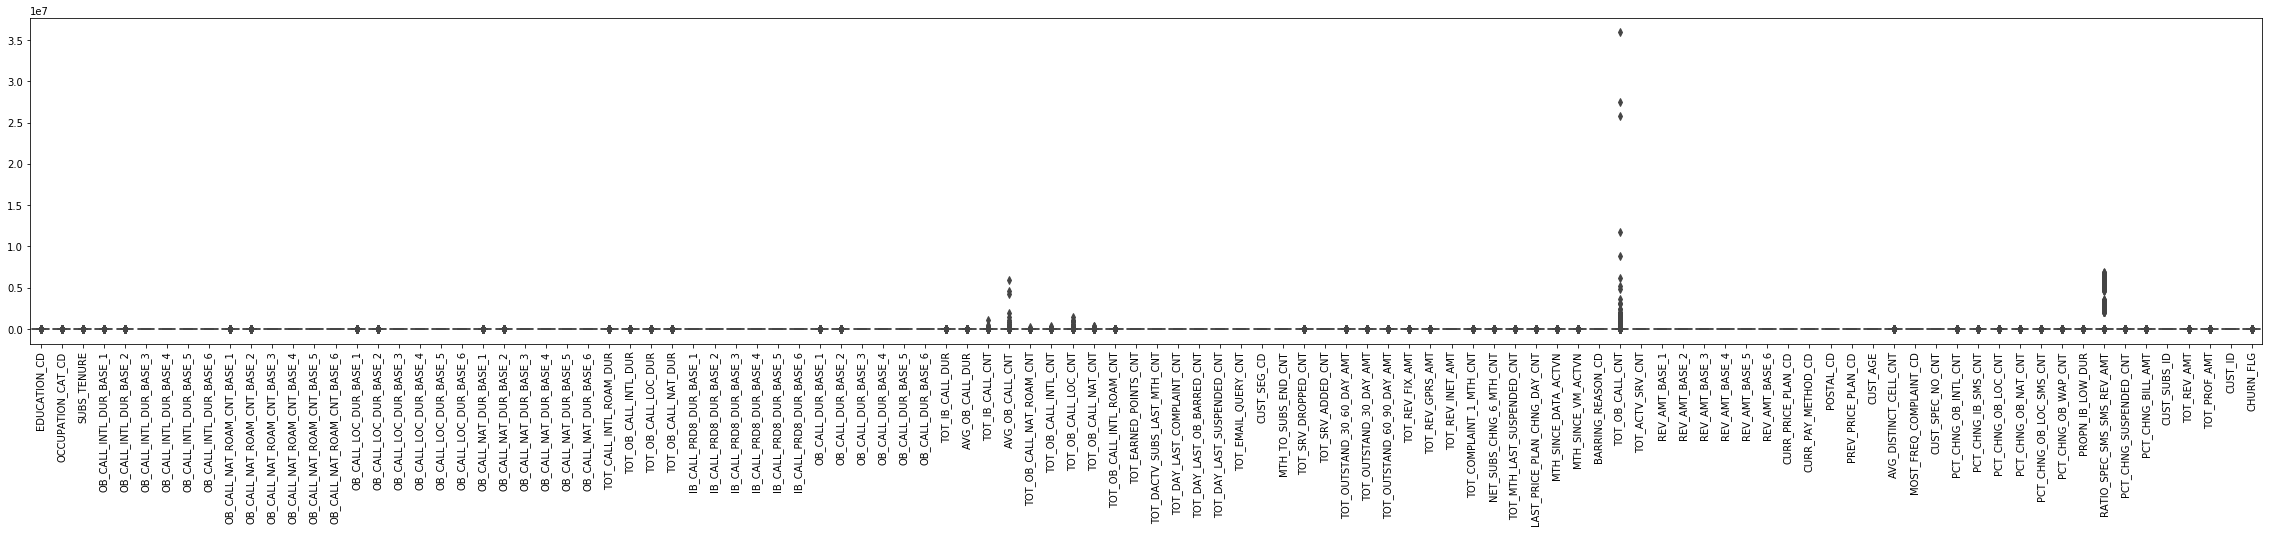

In [19]:
## Since all the null values have been removed, now we need to retake a look at the data
plt.figure(figsize = (40,6))
sns.boxplot(data = Telecom_churn)
plt.xticks(rotation=90)

In [20]:
Telecom_churn.describe()

,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,...,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,CHURN_FLG
count,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,...,13196.000000,13196.000000,1.319600e+04,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000
mean,1.718172,34.997727,119.854956,14.765944,14.866619,15.507752,15.486564,15.515080,15.492331,7.382972,...,0.962725,0.958707,1.107613e+05,181.500177,1.134070,6598.500000,22.067824,22.067824,3899.567824,0.082677
std,0.698012,18.164838,27.139618,3.688206,3.531747,2.595205,2.587189,2.609266,2.608298,1.844103,...,0.220144,0.686199,6.870144e+05,1042.495817,0.432525,3809.501411,16.706817,16.706817,2236.650159,0.275403
min,1.000000,1.000000,24.000000,2.000000,3.000000,11.000000,11.000000,11.000000,11.000000,1.000000,...,0.150782,0.000000,0.000000e+00,0.000000,0.245428,1.000000,-3.000000,-3.000000,1.000000,0.000000
25%,1.000000,30.000000,102.000000,12.700000,12.800000,13.300000,13.300000,13.300000,13.200000,6.350000,...,0.873424,0.550543,0.000000e+00,0.000000,0.823936,3299.750000,22.000000,22.000000,1971.750000,0.000000
50%,2.000000,35.000000,120.000000,15.100000,15.200000,15.500000,15.500000,15.500000,15.400000,7.550000,...,0.984957,0.823529,0.000000e+00,0.000000,1.087538,6598.500000,22.000000,22.000000,3898.500000,0.000000
75%,2.000000,35.000000,138.000000,17.500000,17.600000,17.700000,17.700000,17.800000,17.800000,8.750000,...,1.095395,1.200000,0.000000e+00,0.000000,1.373761,9897.250000,22.000000,22.000000,5833.250000,0.000000
max,7.000000,99.000000,240.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000,...,1.706667,26.000000,6.905000e+06,10000.000000,5.069565,13196.000000,100.000000,100.000000,7800.000000,1.000000


In [21]:
q1 = Telecom_churn.quantile(.25)
q3 = Telecom_churn.quantile(.75)
iqr = q3-q1
print(iqr)

EDUCATION_CD                      1.000000
OCCUPATION_CAT_CD                 5.000000
SUBS_TENURE                      36.000000
OB_CALL_INTL_DUR_BASE_1           4.800000
OB_CALL_INTL_DUR_BASE_2           4.800000
OB_CALL_INTL_DUR_BASE_3           4.400000
OB_CALL_INTL_DUR_BASE_4           4.400000
OB_CALL_INTL_DUR_BASE_5           4.500000
OB_CALL_INTL_DUR_BASE_6           4.600000
OB_CALL_NAT_ROAM_CNT_BASE_1       2.400000
OB_CALL_NAT_ROAM_CNT_BASE_2       2.400000
OB_CALL_NAT_ROAM_CNT_BASE_3       2.200000
OB_CALL_NAT_ROAM_CNT_BASE_4       2.200000
OB_CALL_NAT_ROAM_CNT_BASE_5       2.250000
OB_CALL_NAT_ROAM_CNT_BASE_6       2.300000
OB_CALL_LOC_DUR_BASE_1           28.800000
OB_CALL_LOC_DUR_BASE_2           28.800000
OB_CALL_LOC_DUR_BASE_3           26.400000
OB_CALL_LOC_DUR_BASE_4           26.400000
OB_CALL_LOC_DUR_BASE_5           27.000000
OB_CALL_LOC_DUR_BASE_6           27.600000
OB_CALL_NAT_DUR_BASE_1           12.000000
OB_CALL_NAT_DUR_BASE_2           12.000000
OB_CALL_NAT

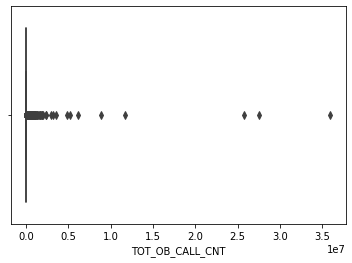

In [22]:
sns.boxplot(Telecom_churn["TOT_OB_CALL_CNT"])

In [23]:
q1_dr = Telecom_churn["TOT_OB_CALL_CNT"].quantile(0.25)
q3_dr = Telecom_churn["TOT_OB_CALL_CNT"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(2442.0, 7255.5, 4813.5)

In [24]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(-4778.25, 14475.75)

In [25]:
Telecom_churn["TOT_OB_CALL_CNT"] = np.where(Telecom_churn["TOT_OB_CALL_CNT"] < lb_dr, lb_dr, Telecom_churn["TOT_OB_CALL_CNT"])
Telecom_churn["TOT_OB_CALL_CNT"] = np.where(Telecom_churn["TOT_OB_CALL_CNT"] > ub_dr, ub_dr, Telecom_churn["TOT_OB_CALL_CNT"])

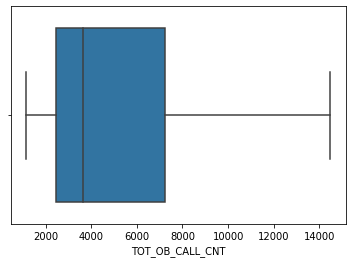

In [26]:
sns.boxplot(Telecom_churn["TOT_OB_CALL_CNT"])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105]), <a list of 106 Text xticklabel objects>)

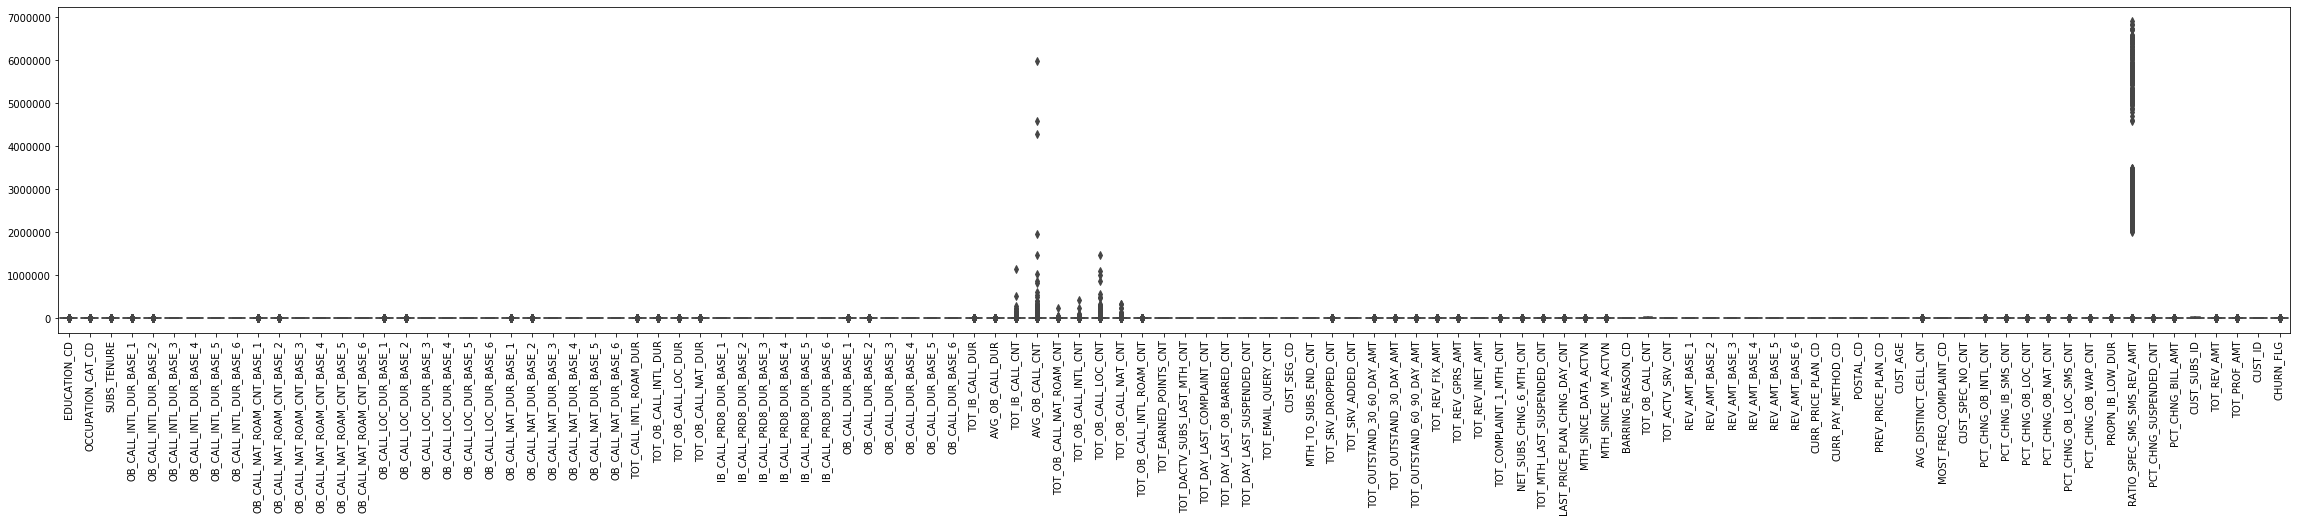

In [27]:
plt.figure(figsize = (40,6))
sns.boxplot(data = Telecom_churn)
plt.xticks(rotation=90)

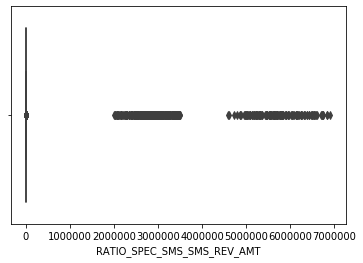

In [28]:
sns.boxplot(Telecom_churn["RATIO_SPEC_SMS_SMS_REV_AMT"])

In [29]:
q1_dr = Telecom_churn["RATIO_SPEC_SMS_SMS_REV_AMT"].quantile(0.25)
q3_dr = Telecom_churn["RATIO_SPEC_SMS_SMS_REV_AMT"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(0.0, 0.0, 0.0)

In [30]:
Telecom_churn["RATIO_SPEC_SMS_SMS_REV_AMT"].describe()

count    1.319600e+04
mean     1.107613e+05
std      6.870144e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.905000e+06
Name: RATIO_SPEC_SMS_SMS_REV_AMT, dtype: float64

In [31]:
print(Telecom_churn < q1-(iqr*1.5)) | (Telecom_churn > q3+(iqr*1.5))

       AVG_DISTINCT_CELL_CNT  AVG_OB_CALL_CNT  AVG_OB_CALL_DUR  \
0                      False            False            False   
1                      False            False             True   
2                      False            False            False   
3                      False            False            False   
4                      False            False            False   
5                      False            False            False   
6                      False            False            False   
7                      False            False            False   
8                      False            False            False   
9                      False            False            False   
10                     False            False            False   
11                     False            False            False   
12                     False            False            False   
13                     False            False            False   
14        

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(Telecom_churn < q1-(iqr*1.5)) | (Telecom_churn > q3+(iqr*1.5))


In [ ]:
Telecom_churn.columns

In [ ]:
##AVG_OB_CALL_DUR,OB_CALL_DUR_BASE_1,OB_CALL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_2,OB_CALL_LOC_DUR_BASE_1,OB_CALL_LOC_DUR_BASE_2,OB_CALL_NAT_DUR_BASE_1,OB_CALL_NAT_DUR_BASE_2,OB_CALL_NAT_ROAM_CNT_BASE_1,OB_CALL_NAT_ROAM_CNT_BASE_2,OCCUPATION_CAT_CD,PCT_CHNG_OB_INTL_CNT,PCT_CHNG_OB_LOC_CNT,PCT_CHNG_OB_LOC_SMS_CNT,PCT_CHNG_OB_NAT_CNT,PCT_CHNG_OB_WAP_CNT, TOT_CALL_INTL_ROAM_DUR, TOT_IB_CALL_DUR, TOT_OB_CALL_INTL_DUR, TOT_OB_CALL_LOC_DUR, TOT_OB_CALL_NAT_DUR, TOT_PROF_AMT, TOT_REV_AMT
## Name cannot be put into quartiles

sns.boxplot(Telecom_churn["AVG_OB_CALL_DUR"])

In [ ]:
q1_dr = Telecom_churn["AVG_OB_CALL_DUR"].quantile(0.25)
q3_dr = Telecom_churn["AVG_OB_CALL_DUR"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

In [ ]:
Telecom_churn["AVG_OB_CALL_DUR"] = np.where(Telecom_churn["AVG_OB_CALL_DUR"] < lb_dr, lb_dr, Telecom_churn["AVG_OB_CALL_DUR"])
Telecom_churn["AVG_OB_CALL_DUR"] = np.where(Telecom_churn["AVG_OB_CALL_DUR"] > ub_dr, ub_dr, Telecom_churn["AVG_OB_CALL_DUR"])

In [ ]:
sns.boxplot(Telecom_churn["AVG_OB_CALL_DUR"])

In [ ]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

In [ ]:
sns.boxplot(Telecom_churn["OB_CALL_DUR_BASE_1"])

In [ ]:
q1_dr = Telecom_churn["OB_CALL_DUR_BASE_1"].quantile(0.25)
q3_dr = Telecom_churn["OB_CALL_DUR_BASE_1"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

In [ ]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

In [ ]:
Telecom_churn["OB_CALL_DUR_BASE_1"] = np.where(Telecom_churn["OB_CALL_DUR_BASE_1"] < lb_dr, lb_dr, Telecom_churn["OB_CALL_DUR_BASE_1"])
Telecom_churn["OB_CALL_DUR_BASE_1"] = np.where(Telecom_churn["OB_CALL_DUR_BASE_1"] > ub_dr, ub_dr, Telecom_churn["OB_CALL_DUR_BASE_1"])

In [ ]:
sns.boxplot(Telecom_churn["OB_CALL_DUR_BASE_1"])

In [ ]:
sns.boxplot(Telecom_churn["OB_CALL_DUR_BASE_2"])

In [ ]:
q1_dr = Telecom_churn["OB_CALL_DUR_BASE_2"].quantile(0.25)
q3_dr = Telecom_churn["OB_CALL_DUR_BASE_2"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

In [32]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(0.0, 0.0)

In [33]:
Telecom_churn["OB_CALL_DUR_BASE_2"] = np.where(Telecom_churn["OB_CALL_DUR_BASE_2"] < lb_dr, lb_dr, Telecom_churn["OB_CALL_DUR_BASE_2"])
Telecom_churn["OB_CALL_DUR_BASE_2"] = np.where(Telecom_churn["OB_CALL_DUR_BASE_2"] > ub_dr, ub_dr, Telecom_churn["OB_CALL_DUR_BASE_2"])

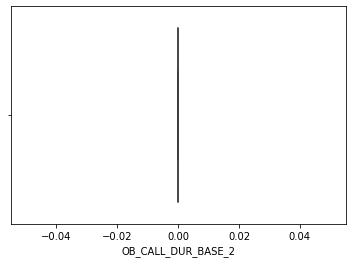

In [34]:
sns.boxplot(Telecom_churn["OB_CALL_DUR_BASE_2"])

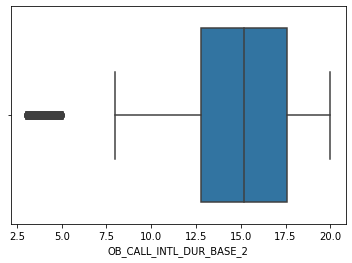

In [35]:
sns.boxplot(Telecom_churn["OB_CALL_INTL_DUR_BASE_2"])

In [36]:
q1_dr = Telecom_churn["OB_CALL_INTL_DUR_BASE_2"].quantile(0.25)
q3_dr = Telecom_churn["OB_CALL_INTL_DUR_BASE_2"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(12.8, 17.6, 4.800000000000001)

In [37]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(5.6, 24.800000000000004)

In [38]:
Telecom_churn["OB_CALL_INTL_DUR_BASE_2"] = np.where(Telecom_churn["OB_CALL_INTL_DUR_BASE_2"] < lb_dr, lb_dr, Telecom_churn["OB_CALL_INTL_DUR_BASE_2"])
Telecom_churn["OB_CALL_INTL_DUR_BASE_2"] = np.where(Telecom_churn["OB_CALL_INTL_DUR_BASE_2"] > ub_dr, ub_dr, Telecom_churn["OB_CALL_INTL_DUR_BASE_2"])

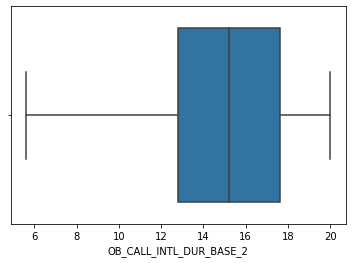

In [39]:
sns.boxplot(Telecom_churn["OB_CALL_INTL_DUR_BASE_2"])

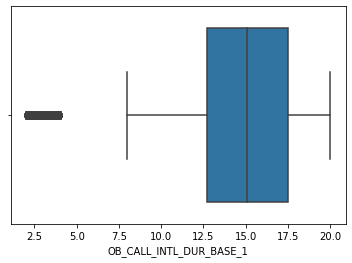

In [40]:
sns.boxplot(Telecom_churn["OB_CALL_INTL_DUR_BASE_1"])

In [41]:
q1_dr = Telecom_churn["OB_CALL_INTL_DUR_BASE_1"].quantile(0.25)
q3_dr = Telecom_churn["OB_CALL_INTL_DUR_BASE_1"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(12.7, 17.5, 4.800000000000001)

In [42]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(5.499999999999998, 24.700000000000003)

In [43]:
Telecom_churn["OB_CALL_INTL_DUR_BASE_1"] = np.where(Telecom_churn["OB_CALL_INTL_DUR_BASE_1"] < lb_dr, lb_dr, Telecom_churn["OB_CALL_INTL_DUR_BASE_1"])
Telecom_churn["OB_CALL_INTL_DUR_BASE_1"] = np.where(Telecom_churn["OB_CALL_INTL_DUR_BASE_1"] > ub_dr, ub_dr, Telecom_churn["OB_CALL_INTL_DUR_BASE_1"])

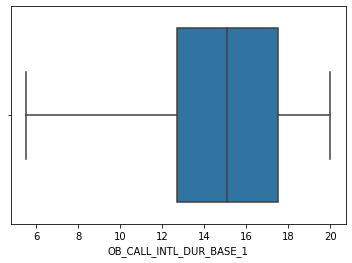

In [44]:
sns.boxplot(Telecom_churn["OB_CALL_INTL_DUR_BASE_1"])

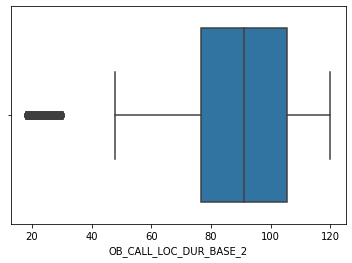

In [45]:
sns.boxplot(Telecom_churn["OB_CALL_LOC_DUR_BASE_2"])

In [46]:
q1_dr = Telecom_churn["OB_CALL_LOC_DUR_BASE_2"].quantile(0.25)
q3_dr = Telecom_churn["OB_CALL_LOC_DUR_BASE_2"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(76.8, 105.6, 28.799999999999997)

In [47]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(33.6, 148.79999999999998)

In [48]:
Telecom_churn["OB_CALL_LOC_DUR_BASE_2"] = np.where(Telecom_churn["OB_CALL_LOC_DUR_BASE_2"] < lb_dr, lb_dr, Telecom_churn["OB_CALL_LOC_DUR_BASE_2"])
Telecom_churn["OB_CALL_LOC_DUR_BASE_2"] = np.where(Telecom_churn["OB_CALL_LOC_DUR_BASE_2"] > ub_dr, ub_dr, Telecom_churn["OB_CALL_LOC_DUR_BASE_2"])

In [49]:
q1_dr = Telecom_churn["OB_CALL_LOC_DUR_BASE_1"].quantile(0.25)
q3_dr = Telecom_churn["OB_CALL_LOC_DUR_BASE_1"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(76.2, 105.0, 28.799999999999997)

In [50]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(33.00000000000001, 148.2)

In [51]:
Telecom_churn["OB_CALL_LOC_DUR_BASE_1"] = np.where(Telecom_churn["OB_CALL_LOC_DUR_BASE_1"] < lb_dr, lb_dr, Telecom_churn["OB_CALL_LOC_DUR_BASE_1"])
Telecom_churn["OB_CALL_LOC_DUR_BASE_1"] = np.where(Telecom_churn["OB_CALL_LOC_DUR_BASE_1"] > ub_dr, ub_dr, Telecom_churn["OB_CALL_LOC_DUR_BASE_1"])

In [52]:
q1_dr = Telecom_churn["OB_CALL_NAT_DUR_BASE_2"].quantile(0.25)
q3_dr = Telecom_churn["OB_CALL_NAT_DUR_BASE_2"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr


(32.0, 44.0, 12.0)

In [53]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(14.0, 62.0)

In [54]:
Telecom_churn["OB_CALL_NAT_DUR_BASE_2"] = np.where(Telecom_churn["OB_CALL_NAT_DUR_BASE_2"] < lb_dr, lb_dr, Telecom_churn["OB_CALL_NAT_DUR_BASE_2"])
Telecom_churn["OB_CALL_NAT_DUR_BASE_2"] = np.where(Telecom_churn["OB_CALL_NAT_DUR_BASE_2"] > ub_dr, ub_dr, Telecom_churn["OB_CALL_NAT_DUR_BASE_2"])

In [55]:
q1_dr = Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_1"].quantile(0.25)
q3_dr = Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_1"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(6.35, 8.75, 2.4000000000000004)

In [56]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(2.749999999999999, 12.350000000000001)

In [57]:
Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_1"] = np.where(Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_1"] < lb_dr, lb_dr, Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_1"])
Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_1"] = np.where(Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_1"] > ub_dr, ub_dr, Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_1"])

In [58]:
q1_dr = Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_2"].quantile(0.25)
q3_dr = Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_2"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(6.4, 8.8, 2.4000000000000004)

In [59]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(2.8, 12.400000000000002)

In [60]:
Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_2"] = np.where(Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_2"] < lb_dr, lb_dr, Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_2"])
Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_2"] = np.where(Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_2"] > ub_dr, ub_dr, Telecom_churn["OB_CALL_NAT_ROAM_CNT_BASE_2"])

In [61]:
q1_dr = Telecom_churn["OCCUPATION_CAT_CD"].quantile(0.25)
q3_dr = Telecom_churn["OCCUPATION_CAT_CD"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(30.0, 35.0, 5.0)

In [62]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(22.5, 42.5)

In [63]:
Telecom_churn["OCCUPATION_CAT_CD"] = np.where(Telecom_churn["OCCUPATION_CAT_CD"] < lb_dr, lb_dr, Telecom_churn["OCCUPATION_CAT_CD"])
Telecom_churn["OCCUPATION_CAT_CD"] = np.where(Telecom_churn["OCCUPATION_CAT_CD"] > ub_dr, ub_dr, Telecom_churn["OCCUPATION_CAT_CD"])

In [64]:
q1_dr = Telecom_churn["PCT_CHNG_OB_INTL_CNT"].quantile(0.25)
q3_dr = Telecom_churn["PCT_CHNG_OB_INTL_CNT"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr


(0.8734243697499999, 1.0953947368, 0.22197036705000017)

In [65]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(0.5404688191749997, 1.4283502873750002)

In [66]:
Telecom_churn["PCT_CHNG_OB_INTL_CNT"] = np.where(Telecom_churn["PCT_CHNG_OB_INTL_CNT"] < lb_dr, lb_dr, Telecom_churn["PCT_CHNG_OB_INTL_CNT"])
Telecom_churn["PCT_CHNG_OB_INTL_CNT"] = np.where(Telecom_churn["PCT_CHNG_OB_INTL_CNT"] > ub_dr, ub_dr, Telecom_churn["PCT_CHNG_OB_INTL_CNT"])

In [67]:
q1_dr = Telecom_churn["PCT_CHNG_OB_LOC_CNT"].quantile(0.25)
q3_dr = Telecom_churn["PCT_CHNG_OB_LOC_CNT"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr


(0.8734243697499999, 1.0953947368, 0.22197036705000017)

In [68]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(0.5404688191749997, 1.4283502873750002)

In [69]:
Telecom_churn["PCT_CHNG_OB_LOC_CNT"] = np.where(Telecom_churn["PCT_CHNG_OB_LOC_CNT"] < lb_dr, lb_dr, Telecom_churn["PCT_CHNG_OB_LOC_CNT"])
Telecom_churn["PCT_CHNG_OB_LOC_CNT"] = np.where(Telecom_churn["PCT_CHNG_OB_LOC_CNT"] > ub_dr, ub_dr, Telecom_churn["PCT_CHNG_OB_LOC_CNT"])

In [70]:
q1_dr = Telecom_churn["PCT_CHNG_OB_LOC_SMS_CNT"].quantile(0.25)
q3_dr = Telecom_churn["PCT_CHNG_OB_LOC_SMS_CNT"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr


(0.8734243697499999, 1.0953947368, 0.22197036705000017)

In [71]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(0.5404688191749997, 1.4283502873750002)

In [72]:
Telecom_churn["PCT_CHNG_OB_LOC_SMS_CNT"] = np.where(Telecom_churn["PCT_CHNG_OB_LOC_SMS_CNT"] < lb_dr, lb_dr, Telecom_churn["PCT_CHNG_OB_LOC_SMS_CNT"])
Telecom_churn["PCT_CHNG_OB_LOC_SMS_CNT"] = np.where(Telecom_churn["PCT_CHNG_OB_LOC_SMS_CNT"] > ub_dr, ub_dr, Telecom_churn["PCT_CHNG_OB_LOC_SMS_CNT"])

In [73]:
q1_dr = Telecom_churn["PCT_CHNG_OB_NAT_CNT"].quantile(0.25)
q3_dr = Telecom_churn["PCT_CHNG_OB_NAT_CNT"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr


(0.8734243697499999, 1.0953947368, 0.22197036705000017)

In [74]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(0.5404688191749997, 1.4283502873750002)

In [75]:
Telecom_churn["PCT_CHNG_OB_NAT_CNT"] = np.where(Telecom_churn["PCT_CHNG_OB_NAT_CNT"] < lb_dr, lb_dr, Telecom_churn["PCT_CHNG_OB_NAT_CNT"])
Telecom_churn["PCT_CHNG_OB_NAT_CNT"] = np.where(Telecom_churn["PCT_CHNG_OB_NAT_CNT"] > ub_dr, ub_dr, Telecom_churn["PCT_CHNG_OB_NAT_CNT"])

In [76]:
q1_dr = Telecom_churn["PCT_CHNG_OB_WAP_CNT"].quantile(0.25)
q3_dr = Telecom_churn["PCT_CHNG_OB_WAP_CNT"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr


(0.8734243697499999, 1.0953947368, 0.22197036705000017)

In [77]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(0.5404688191749997, 1.4283502873750002)

In [78]:
Telecom_churn["PCT_CHNG_OB_WAP_CNT"] = np.where(Telecom_churn["PCT_CHNG_OB_WAP_CNT"] < lb_dr, lb_dr, Telecom_churn["PCT_CHNG_OB_WAP_CNT"])
Telecom_churn["PCT_CHNG_OB_WAP_CNT"] = np.where(Telecom_churn["PCT_CHNG_OB_WAP_CNT"] > ub_dr, ub_dr, Telecom_churn["PCT_CHNG_OB_WAP_CNT"])

In [79]:
q1_dr = Telecom_churn["TOT_CALL_INTL_ROAM_DUR"].quantile(0.25)
q3_dr = Telecom_churn["TOT_CALL_INTL_ROAM_DUR"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(7.2829999999999995, 8.083, 0.8000000000000007)

In [80]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(6.082999999999998, 9.283000000000001)

In [81]:
Telecom_churn["TOT_CALL_INTL_ROAM_DUR"] = np.where(Telecom_churn["TOT_CALL_INTL_ROAM_DUR"] < lb_dr, lb_dr, Telecom_churn["TOT_CALL_INTL_ROAM_DUR"])
Telecom_churn["TOT_CALL_INTL_ROAM_DUR"] = np.where(Telecom_churn["TOT_CALL_INTL_ROAM_DUR"] > ub_dr, ub_dr, Telecom_churn["TOT_CALL_INTL_ROAM_DUR"])

In [82]:
q1_dr = Telecom_churn["TOT_IB_CALL_DUR"].quantile(0.25)
q3_dr = Telecom_churn["TOT_IB_CALL_DUR"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(39.5, 53.5, 14.0)

In [83]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(18.5, 74.5)

In [84]:
Telecom_churn["TOT_IB_CALL_DUR"] = np.where(Telecom_churn["TOT_IB_CALL_DUR"] < lb_dr, lb_dr, Telecom_churn["TOT_IB_CALL_DUR"])
Telecom_churn["TOT_IB_CALL_DUR"] = np.where(Telecom_churn["TOT_IB_CALL_DUR"] > ub_dr, ub_dr, Telecom_churn["TOT_IB_CALL_DUR"])

In [85]:
q1_dr = Telecom_churn["TOT_OB_CALL_INTL_DUR"].quantile(0.25)
q3_dr = Telecom_churn["TOT_OB_CALL_INTL_DUR"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(7.2829999999999995, 8.083, 0.8000000000000007)

In [86]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(6.082999999999998, 9.283000000000001)

In [87]:
Telecom_churn["TOT_OB_CALL_INTL_DUR"] = np.where(Telecom_churn["TOT_OB_CALL_INTL_DUR"] < lb_dr, lb_dr, Telecom_churn["TOT_OB_CALL_INTL_DUR"])
Telecom_churn["TOT_OB_CALL_INTL_DUR"] = np.where(Telecom_churn["TOT_OB_CALL_INTL_DUR"] > ub_dr, ub_dr, Telecom_churn["TOT_OB_CALL_INTL_DUR"])

In [88]:
q1_dr = Telecom_churn["TOT_OB_CALL_LOC_DUR"].quantile(0.25)
q3_dr = Telecom_churn["TOT_OB_CALL_LOC_DUR"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(87.4, 97.0, 9.599999999999994)

In [89]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(73.00000000000001, 111.39999999999999)

In [90]:
Telecom_churn["TOT_OB_CALL_LOC_DUR"] = np.where(Telecom_churn["TOT_OB_CALL_LOC_DUR"] < lb_dr, lb_dr, Telecom_churn["TOT_OB_CALL_LOC_DUR"])
Telecom_churn["TOT_OB_CALL_LOC_DUR"] = np.where(Telecom_churn["TOT_OB_CALL_LOC_DUR"] > ub_dr, ub_dr, Telecom_churn["TOT_OB_CALL_LOC_DUR"])

In [91]:
q1_dr = Telecom_churn["TOT_OB_CALL_NAT_DUR"].quantile(0.25)
q3_dr = Telecom_churn["TOT_OB_CALL_NAT_DUR"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(36.417, 40.417, 4.0)

In [92]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(30.417, 46.417)

In [93]:
Telecom_churn["TOT_OB_CALL_NAT_DUR"] = np.where(Telecom_churn["TOT_OB_CALL_NAT_DUR"] < lb_dr, lb_dr, Telecom_churn["TOT_OB_CALL_NAT_DUR"])
Telecom_churn["TOT_OB_CALL_NAT_DUR"] = np.where(Telecom_churn["TOT_OB_CALL_NAT_DUR"] > ub_dr, ub_dr, Telecom_churn["TOT_OB_CALL_NAT_DUR"])

In [94]:
q1_dr = Telecom_churn["TOT_PROF_AMT"].quantile(0.25)
q3_dr = Telecom_churn["TOT_PROF_AMT"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(22.0, 22.0, 0.0)

In [95]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(22.0, 22.0)

In [96]:
Telecom_churn["TOT_PROF_AMT"] = np.where(Telecom_churn["TOT_PROF_AMT"] < lb_dr, lb_dr, Telecom_churn["TOT_PROF_AMT"])
Telecom_churn["TOT_PROF_AMT"] = np.where(Telecom_churn["TOT_PROF_AMT"] > ub_dr, ub_dr, Telecom_churn["TOT_PROF_AMT"])

In [97]:
q1_dr = Telecom_churn["TOT_REV_AMT"].quantile(0.25)
q3_dr = Telecom_churn["TOT_REV_AMT"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(22.0, 22.0, 0.0)

In [98]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(22.0, 22.0)

In [99]:
Telecom_churn["TOT_REV_AMT"] = np.where(Telecom_churn["TOT_REV_AMT"] < lb_dr, lb_dr, Telecom_churn["TOT_REV_AMT"])
Telecom_churn["TOT_REV_AMT"] = np.where(Telecom_churn["TOT_REV_AMT"] > ub_dr, ub_dr, Telecom_churn["TOT_REV_AMT"])

In [100]:
## Now check if there are still any outliers
print(Telecom_churn < q1-(iqr*1.5)) | (Telecom_churn > q3+(iqr*1.5))

       AVG_DISTINCT_CELL_CNT  AVG_OB_CALL_CNT  AVG_OB_CALL_DUR  \
0                      False            False            False   
1                      False            False             True   
2                      False            False            False   
3                      False            False            False   
4                      False            False            False   
5                      False            False            False   
6                      False            False            False   
7                      False            False            False   
8                      False            False            False   
9                      False            False            False   
10                     False            False            False   
11                     False            False            False   
12                     False            False            False   
13                     False            False            False   
14        

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105]), <a list of 106 Text xticklabel objects>)

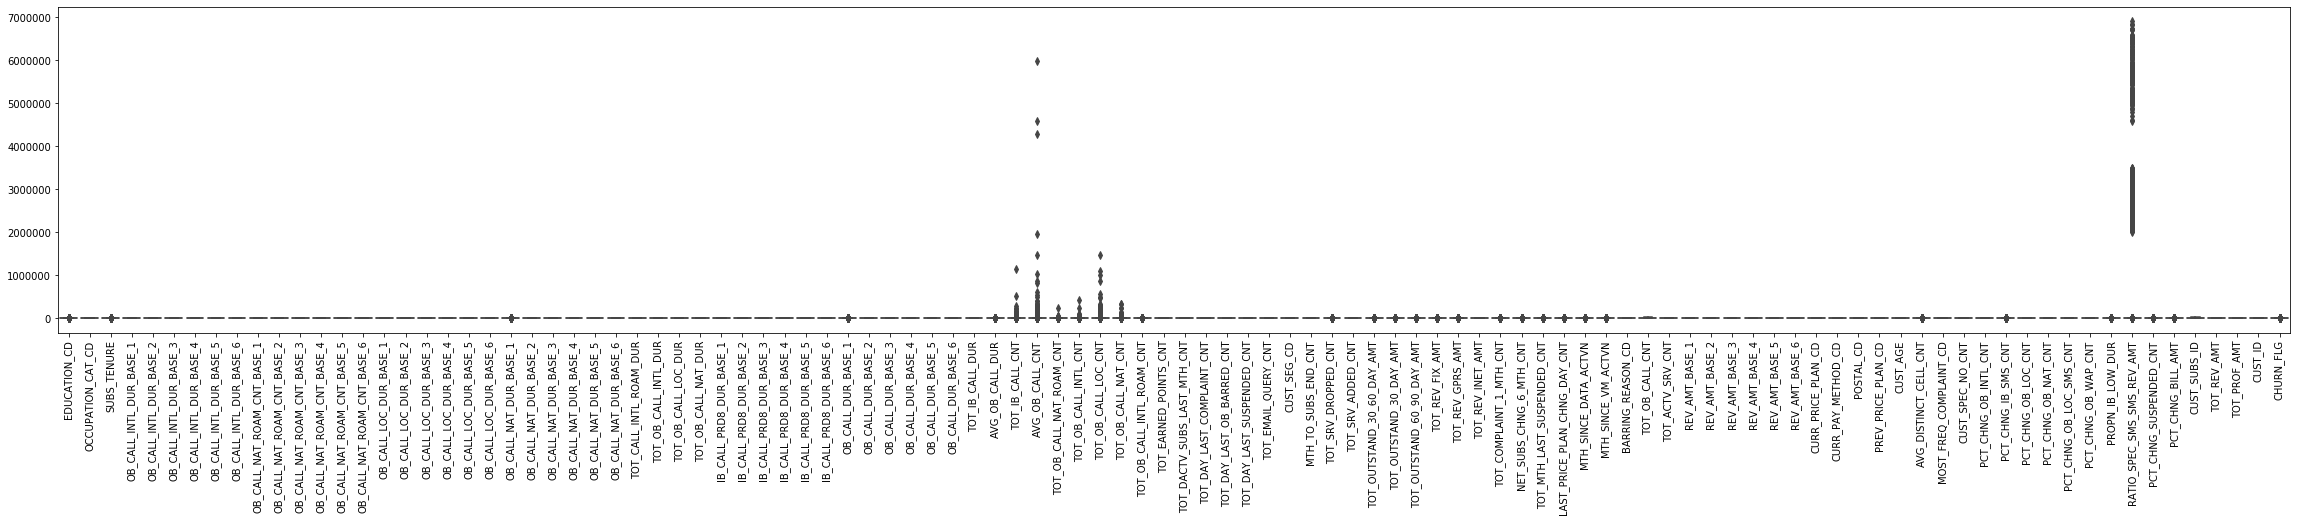

In [101]:
plt.figure(figsize = (40,6))
sns.boxplot(data = Telecom_churn)
plt.xticks(rotation=90)

In [102]:
Telecom_churn["RATIO_SPEC_SMS_SMS_REV_AMT"].mean()

110761.28026721708

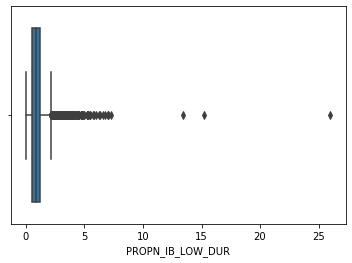

In [103]:
sns.boxplot(Telecom_churn["PROPN_IB_LOW_DUR"])


In [104]:
q1_dr = Telecom_churn["PROPN_IB_LOW_DUR"].quantile(0.25)
q3_dr = Telecom_churn["PROPN_IB_LOW_DUR"].quantile(0.75)
iqr_dr = q3_dr - q1_dr

q1_dr, q3_dr, iqr_dr

(0.550543478275, 1.2, 0.6494565217249999)

In [105]:
lb_dr = q1_dr - iqr_dr*1.5
ub_dr = q3_dr + iqr_dr*1.5

lb_dr, ub_dr

(-0.4236413043124998, 2.1741847825875)

In [106]:
Telecom_churn["PROPN_IB_LOW_DUR"] = np.where(Telecom_churn["PROPN_IB_LOW_DUR"] < lb_dr, lb_dr, Telecom_churn["PROPN_IB_LOW_DUR"])
Telecom_churn["PROPN_IB_LOW_DUR"] = np.where(Telecom_churn["PROPN_IB_LOW_DUR"] > ub_dr, ub_dr, Telecom_churn["PROPN_IB_LOW_DUR"])

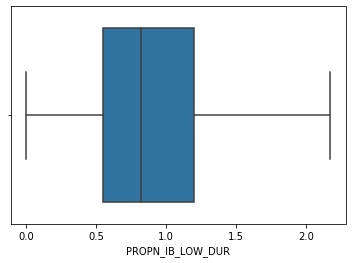

In [107]:
sns.boxplot(Telecom_churn["PROPN_IB_LOW_DUR"])


In [108]:
## Now save the cleaned file for later use
Telecom_churn.to_csv("C:\\Users\\andre\\OneDrive\\Desktop\\New folder\\Telecom_churn_CLEANED2.csv")

In [109]:
## Now some visualization
Telecom_churn.head()

,GENDER_CD,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,...,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,name,CHURN_FLG
0,M,2.0,35.0,198,16.8,16.3,15.2,18.0,15.4,13.9,...,0.739130,0.000000,0.0,0.955526,1,22.0,22.0,5198,Amy H Thomas,0
1,M,1.0,35.0,114,5.5,5.6,19.0,16.1,11.6,13.6,...,1.576923,1.563786,0.0,0.938199,2,22.0,22.0,752,Ignatius T Lyod,1
2,M,2.0,24.0,114,5.5,5.6,18.5,18.8,19.4,16.8,...,1.538462,4.108014,5000.0,0.720440,3,22.0,22.0,3501,Leo C Wood,1
3,M,1.0,42.5,228,16.0,15.8,15.5,17.4,11.7,11.0,...,1.655172,0.000000,0.0,0.880032,4,22.0,22.0,5406,Augustine X Turner,0
4,F,4.0,22.5,168,14.6,14.1,16.3,13.5,13.4,14.6,...,1.733333,0.000000,0.0,1.282770,5,22.0,22.0,6115,Demie A Shaw,1


In [110]:
Telecom_churn.describe()

,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,...,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,CHURN_FLG
count,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,...,13196.000000,13196.000000,1.319600e+04,13196.000000,13196.000000,13196.000000,13196.0,13196.0,13196.000000,13196.000000
mean,1.718172,33.474538,119.854956,14.881320,14.938466,15.507752,15.486564,15.515080,15.492331,7.440660,...,0.976725,0.922769,1.107613e+05,181.500177,1.134070,6598.500000,22.0,22.0,3899.567824,0.082677
std,0.698012,6.838302,27.139618,3.337941,3.317630,2.595205,2.587189,2.609266,2.608298,1.668971,...,0.177319,0.511734,6.870144e+05,1042.495817,0.432525,3809.501411,0.0,0.0,2236.650159,0.275403
min,1.000000,22.500000,24.000000,5.500000,5.600000,11.000000,11.000000,11.000000,11.000000,2.750000,...,0.540469,0.000000,0.000000e+00,0.000000,0.245428,1.000000,22.0,22.0,1.000000,0.000000
25%,1.000000,30.000000,102.000000,12.700000,12.800000,13.300000,13.300000,13.300000,13.200000,6.350000,...,0.873424,0.550543,0.000000e+00,0.000000,0.823936,3299.750000,22.0,22.0,1971.750000,0.000000
50%,2.000000,35.000000,120.000000,15.100000,15.200000,15.500000,15.500000,15.500000,15.400000,7.550000,...,0.984957,0.823529,0.000000e+00,0.000000,1.087538,6598.500000,22.0,22.0,3898.500000,0.000000
75%,2.000000,35.000000,138.000000,17.500000,17.600000,17.700000,17.700000,17.800000,17.800000,8.750000,...,1.095395,1.200000,0.000000e+00,0.000000,1.373761,9897.250000,22.0,22.0,5833.250000,0.000000
max,7.000000,42.500000,240.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000,...,1.428350,2.174185,6.905000e+06,10000.000000,5.069565,13196.000000,22.0,22.0,7800.000000,1.000000


In [111]:
Telecom_churn.shape

(13196, 108)

In [112]:
Telecom_churn.dtypes

GENDER_CD                       object
EDUCATION_CD                   float64
OCCUPATION_CAT_CD              float64
SUBS_TENURE                      int64
OB_CALL_INTL_DUR_BASE_1        float64
OB_CALL_INTL_DUR_BASE_2        float64
OB_CALL_INTL_DUR_BASE_3        float64
OB_CALL_INTL_DUR_BASE_4        float64
OB_CALL_INTL_DUR_BASE_5        float64
OB_CALL_INTL_DUR_BASE_6        float64
OB_CALL_NAT_ROAM_CNT_BASE_1    float64
OB_CALL_NAT_ROAM_CNT_BASE_2    float64
OB_CALL_NAT_ROAM_CNT_BASE_3    float64
OB_CALL_NAT_ROAM_CNT_BASE_4    float64
OB_CALL_NAT_ROAM_CNT_BASE_5    float64
OB_CALL_NAT_ROAM_CNT_BASE_6    float64
OB_CALL_LOC_DUR_BASE_1         float64
OB_CALL_LOC_DUR_BASE_2         float64
OB_CALL_LOC_DUR_BASE_3         float64
OB_CALL_LOC_DUR_BASE_4         float64
OB_CALL_LOC_DUR_BASE_5         float64
OB_CALL_LOC_DUR_BASE_6         float64
OB_CALL_NAT_DUR_BASE_1         float64
OB_CALL_NAT_DUR_BASE_2         float64
OB_CALL_NAT_DUR_BASE_3         float64
OB_CALL_NAT_DUR_BASE_4   

(array([1316., 1669., 1220., 1214., 1184., 1526., 1166., 1222., 1276.,
        1403.]),
 array([20. , 24.2, 28.4, 32.6, 36.8, 41. , 45.2, 49.4, 53.6, 57.8, 62. ]),
 <a list of 10 Patch objects>)

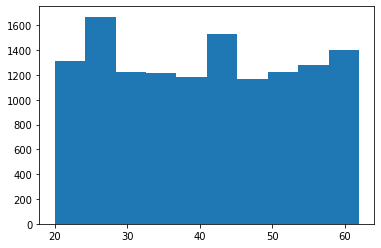

In [113]:
plt.hist(Telecom_churn["CUST_AGE"])

Text(0, 0.5, '# of Customers')

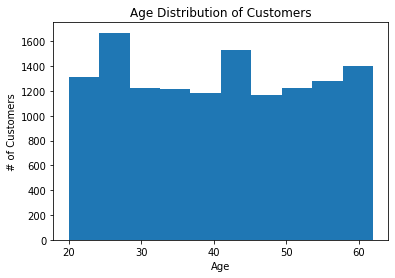

In [114]:
figure,ax = plt.subplots()

ax.hist(Telecom_churn["CUST_AGE"])

ax.set_title("Age Distribution of Customers")
ax.set_xlabel("Age")
ax.set_ylabel("# of Customers")

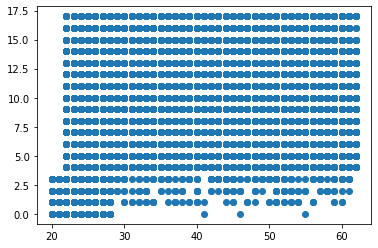

In [115]:
plt.scatter(x = "CUST_AGE", y = "CURR_PRICE_PLAN_CD", data = Telecom_churn)

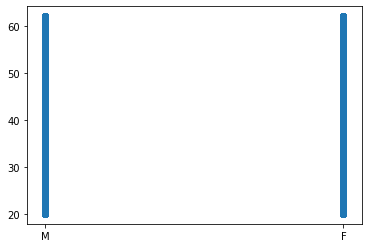

In [116]:
plt.scatter(y = "CUST_AGE", x = "GENDER_CD", data = Telecom_churn)

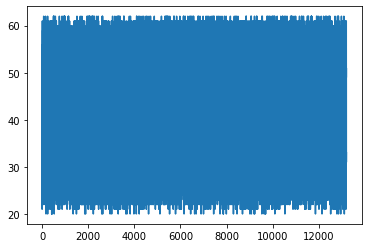

In [117]:
plt.plot(Telecom_churn["CUST_AGE"])

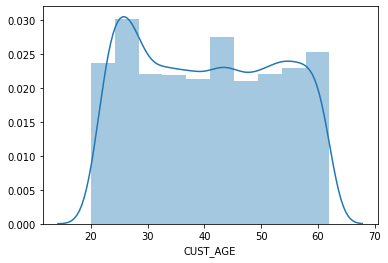

In [118]:
sns.distplot(Telecom_churn["CUST_AGE"],bins = 10)

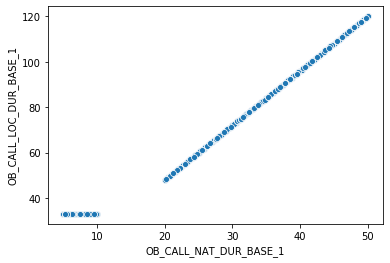

In [119]:
sns.scatterplot(x = "OB_CALL_NAT_DUR_BASE_1", y = "OB_CALL_LOC_DUR_BASE_1", data = Telecom_churn)

In [ ]:
sns.pairplot(Telecom_churn, hue = "CUST_AGE",size = 5)

In [ ]:
plt.figure(figsize = (40,6))
sns.boxplot(data = credit_risk)
plt.xticks(rotation=90) 